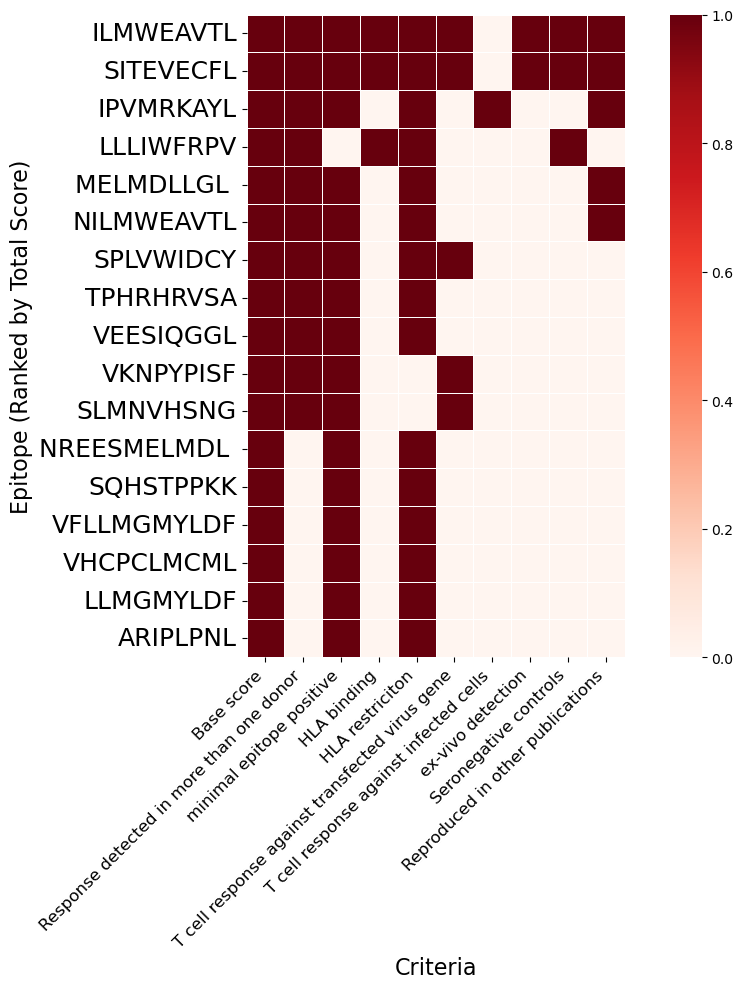

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Dataframe for scoring matrix_JCV.xlsx")
df.dropna(inplace=True)

# Identify scoring columns (all numeric columns)
scoring_cols = df.select_dtypes(include=["number"]).columns

# Compute total score per epitope
df["Total score"] = df[scoring_cols].sum(axis=1)

# Sort epitopes by total score (highest first)
df_sorted = df.sort_values("Total score", ascending=False)

# Matrix for heatmap: rows = epitopes, columns = criteria
matrix = df_sorted.set_index("Epitope")[scoring_cols]

# Create figure
plt.figure(figsize=(10, 10))

sns.heatmap(
    matrix,
    cmap="Reds",
    annot=False,              # <-- removed numbers
    linewidths=0.4,
    linecolor="white",
    cbar=True,
    square=True               # makes squares uniform and compact
)

plt.xlabel("Criteria", fontsize=16)
plt.ylabel("Epitope (Ranked by Total Score)", fontsize=16)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()